num: 1 accuracy for validation set: 0.7516339869281046 step_size: 1e-05 iteration: 10
num: 2 accuracy for validation set: 0.7516339869281046 step_size: 1e-05 iteration: 20
num: 3 accuracy for validation set: 0.7516339869281046 step_size: 1e-05 iteration: 50
num: 4 accuracy for validation set: 0.7516339869281046 step_size: 1e-05 iteration: 100
num: 5 accuracy for validation set: 0.7516339869281046 step_size: 1e-05 iteration: 200
num: 6 accuracy for validation set: 0.7516339869281046 step_size: 1e-05 iteration: 400
num: 7 accuracy for validation set: 0.7516339869281046 step_size: 1e-05 iteration: 800
num: 8 accuracy for validation set: 0.7516339869281046 step_size: 1e-05 iteration: 1000
num: 9 accuracy for validation set: 0.7973856209150327 step_size: 1e-05 iteration: 2000
num: 10 accuracy for validation set: 0.7973856209150327 step_size: 1e-05 iteration: 3000
num: 11 accuracy for validation set: 0.7908496732026143 step_size: 1e-05 iteration: 4000
num: 12 accuracy for validation set: 0.7

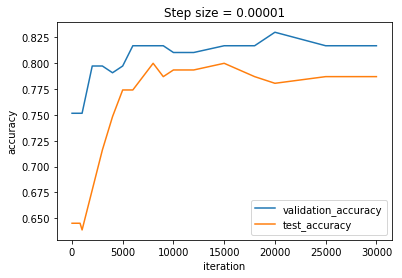

In [35]:
import numpy as np
import csv
import matplotlib.pyplot as plt 

# read data from non-scaled 
dataList = []
dataFile = open('Data_assginmnet1_scaled.csv', encoding = 'utf-8-sig')
reader = csv.reader(dataFile)
for row in reader:
    dataList.append(row)
    
# convert data set to numpy form 
data = np.array(dataList, dtype = np.float32) # (768,9)

# training set : validation set : test set = 6:2:2
# add column of one to include bias
col = np.ones([768,1])
data = np.hstack([data, col])

# training set, first 60% rows, 768*0.6 = 460, n = 460
n = int(len(dataList)/10*6)
training_set = data[:n, :] #(460,10)
validation_set = data[n:613, :]
test_set = data[613:, :]



# compare predict results with true results
def accuracy(Y, Y_predict):
    (m, n) = Y_predict.shape
    count = 0
    for i in range(n):
        if Y_predict[0,i] == Y[0,i]:
            count = count + 1
    return count/n


# validation set
X_validation = validation_set[:, 1:].transpose()
Y_validation = validation_set[:, 0:1].transpose()
# test set
X_test = test_set[:, 1:].transpose()
Y_test = test_set[:, 0:1].transpose()

num = 0
maxAccuracy = 0 # for validation set
validation_accuracy = []
test_accuracy = []

# logistic regression 

# input
# training setup
# output Y = [y(1) y(2) ... y(n)], n = training sample
# select all rows and first cols in training set, then transpose, should be (1,460)
Y = training_set[:, 0:1].transpose() # (1,460)
# input X = [x(1) x(2) ... x(n)], should be (9,460)
X = training_set[:, 1:].transpose()
t_print = [10,20,50,100,200,400,800,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,12000,15000,18000,20000,25000,30000]
T = 30001
# initialise W 
# weight W = [w1, w2, ... w8, b], include bias, (9,1)
n_x = 9
W = np.random.uniform(0,0.00000001,(n_x,1))
step_size = 0.00001

# iteration 
for t in range(T):
    P = 1 - 1/(1 + np.exp(-Y * np.dot(W.T,X)))
    # dw = [dw1, dw2... dw8, db], (9,1)
    dw = -X * Y * P
    # sum over each row and get average
    dw = dw.sum(axis=1)
    dw = dw.reshape(n_x,1)
#         dw = dw/n
    # update W 
    W = W - step_size*dw
    
    # validation and test set
    if(t in t_print):
        # validation set
        Y_validation_predict = np.dot(W.T, X_validation) 
        (m_validation, n_validation) = Y_validation_predict.shape
        for i in range(n_validation):
            if Y_validation_predict[0,i] > 0:
                Y_validation_predict[0,i] = 1
            else:
                Y_validation_predict[0,i] = -1     
        # validation accuracy 
        acc_valid = accuracy(Y_validation,Y_validation_predict)
        validation_accuracy.append(acc_valid)
        
        num = num + 1
        print('num:', num, 'accuracy for validation set:',acc_valid, 'step_size:',step_size,'iteration:',t)
        

        # test set
        Y_predict = np.dot(W.T, X_test)
        (m_test, n_test) = Y_predict.shape
        for i in range(n_test):
            if Y_predict[0,i] > 0:
                Y_predict[0,i] = 1
            else:
                Y_predict[0,i] = -1
        test_accuracy.append(accuracy(Y_test,Y_predict))
        
        # get the max
        if (acc_valid > maxAccuracy):
            maxAccuracy = acc_valid
            maxW = W # W
            maxs = step_size # step size
            maxT = t # iter

            
print(maxAccuracy)
print(maxs)
print(maxT)


fig = plt.figure()
plt.plot(t_print, validation_accuracy)
plt.plot(t_print, test_accuracy)
plt.title('Step size = 0.00001')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend(['validation_accuracy', 'test_accuracy'])
plt.show()
fig.savefig('logistic_1e-5')